In [1]:
from Vehicle import Vehicle
from limo import Limo
from visualization import *
import numpy as np
import sys
import matplotlib.pyplot as plt

pygame 2.1.0 (SDL 2.0.16, Python 3.10.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def test_stability(dt1, dt2, steps, r_factor=0.02, verbose=True):
    """
    Create two cars, both identical with same reference inputs.
    """
    ##########
    car1 = Vehicle(np.array([25, 25]), length=4, width=2, heading=np.pi/2)
    car2 = Vehicle(np.array([25, 25]), length=4, width=2, heading=np.pi/2)
    #car2 = deepcopy(car1)
    # One agent for both
    # Driver
    alpha_max = 0.8
    v_max = 5
    v_min = -2
    var_alpha= 0.2 # 0.3
    var_vel= 0.2 # 0.5
    agent = Agent(v_max=v_max, v_min=v_min, alpha_max=alpha_max, var_alpha=var_alpha, var_vel=var_vel)
    #
    v_ref = 0
    alpha_ref = 0
    # Bookkeeping
    times = np.int32(dt2/dt1) # number of times to run car 1 for each step of car 2

    states_1 = np.zeros((4, 1, steps*times))
    alphas_1 = np.zeros((steps*times,))
    directions_1 = np.ones((steps*times,))
    v_refs_1 = np.ones((steps*times,))*v_ref
    alpha_refs_1 = np.ones((steps*times,))*alpha_ref
    psis_1 = np.zeros((steps*times,))

    states_2 = np.zeros((4, 1, steps))
    alphas_2 = np.zeros((steps,))
    directions_2 = np.ones((steps,))
    v_refs_2 = np.ones((steps,))*v_ref
    alpha_refs_2 = np.ones((steps,))*alpha_ref
    psis_2 = np.zeros((steps,))

    for i in range(steps):
        v_ref, alpha_ref = agent.brownian_action(v_ref, alpha_ref, r_factor=r_factor)
        # Run one cycle of car 2
        car2.one_step_algorithm_2(alpha_ref=alpha_ref, v_ref=v_ref, dt=dt2)

        # Book-keeping
        alphas_2[i] = car2.alpha
        directions_2[i] = car2.actual_direction
        alpha_refs_2[i] = alpha_ref
        v_refs_2[i]= v_ref
        states_2[:, :, i] = car2.X
        psis_2[i] = car2.heading

        for t in range(times):
            index = i*times + t
            # Run one cycle of car 2
            car1.one_step_algorithm_2(alpha_ref=alpha_ref, v_ref=v_ref, dt=dt1)

            # Book-keeping
            alphas_1[index] = car1.alpha
            directions_1[index] = car1.actual_direction
            alpha_refs_1[index] = alpha_ref
            v_refs_1[index]= v_ref
            states_1[:, :, index] = car1.X
            psis_1[index] = car1.heading
    if verbose:
        plot_error(states_1, states_2, steps, times, dt1, dt2)
    return states_1, alphas_1, directions_1, v_refs_1, alpha_refs_1, psis_1, states_2, alphas_2, directions_2, v_refs_2, alpha_refs_2, psis_2, times

def plot_error(states_1, states_2, steps, times, dt1, dt2):
    # plotting accumulative error
    Xs_1 = states_1[0, :].T
    Ys_1 = states_1[1, :].T
    Xs_2 = states_2[0, :].T
    Ys_2 = states_2[1, :].T

    errors = []
    for s in range(steps):
        x2 = Xs_2[s, 0]
        y2 = Ys_2[s, 0]

        x1 = Xs_1[s*times, 0]
        y1 = Ys_1[s*times, 0]

        error = np.linalg.norm((np.array([x1, y1]) - np.array([x2, y2])))
        errors.append(error)
    time_axis_2 = np.linspace(0, steps*dt2-dt2, steps)
    plt.title("error over time")
    plt.plot(time_axis_2, errors, label="Total error")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Error (meters)")
    plt.show()

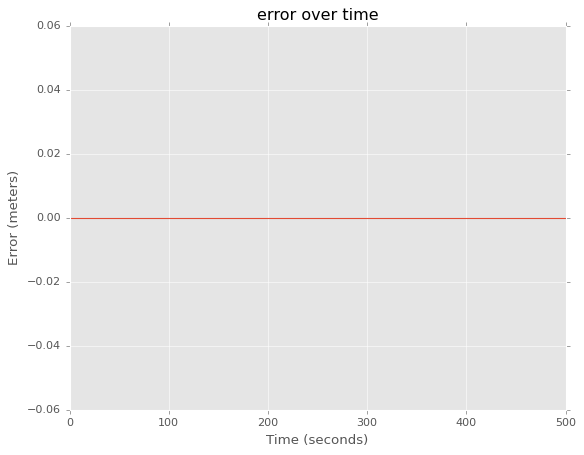

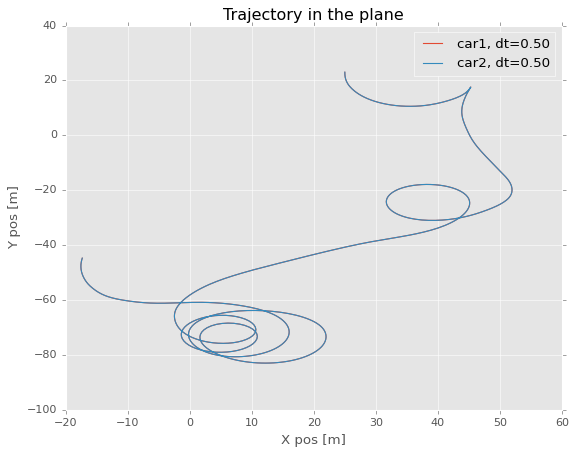

In [3]:
#
dt1 = 0.5 # simulation dt (20 fps)
dt2 = 0.5 # decision dt 
steps = 1000
#
states_1, alphas_1, directions_1, v_refs_1, alpha_refs_1, psis_1, states_2, alphas_2, directions_2, v_refs_2, alpha_refs_2, psis_2, times = test_stability(dt1, dt2, steps, r_factor=0.1)
# Plotting
time_axis_2 = np.linspace(0, steps*dt2-dt2, steps)
time_axis_1 = np.linspace(0, steps*times*dt1-dt1, steps*times)
Xs_1 = states_1[0, :].T
Ys_1 = states_1[1, :].T
Xs_2 = states_2[0, :].T
Ys_2 = states_2[1, :].T
#
plt.plot(Xs_1, Ys_1, label="car1, dt=%.2f" %dt1)
plt.plot(Xs_2, Ys_2, label="car2, dt=%.2f" %dt2)
plt.title("Trajectory in the plane") 
plt.xlabel("X pos [m]")
plt.ylabel("Y pos [m]")
plt.legend()
plt.show()

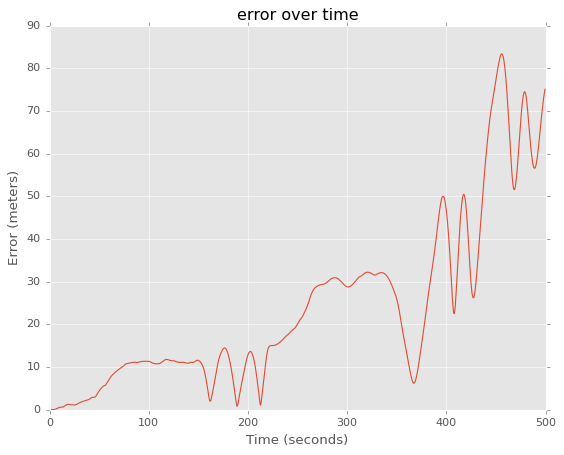

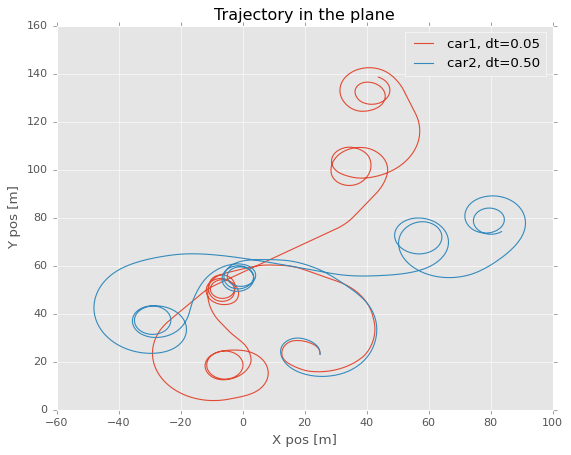

In [4]:
#
dt1 = 0.05 # simulation dt (20 fps)
dt2 = 0.5 # decision dt 
steps = 1000
#
states_1, alphas_1, directions_1, v_refs_1, alpha_refs_1, psis_1, states_2, alphas_2, directions_2, v_refs_2, alpha_refs_2, psis_2, times = test_stability(dt1, dt2, steps, r_factor=0.1)
# Plotting
time_axis_2 = np.linspace(0, steps*dt2-dt2, steps)
time_axis_1 = np.linspace(0, steps*times*dt1-dt1, steps*times)
Xs_1 = states_1[0, :].T
Ys_1 = states_1[1, :].T
Xs_2 = states_2[0, :].T
Ys_2 = states_2[1, :].T
#
plt.plot(Xs_1, Ys_1, label="car1, dt=%.2f" %dt1)
plt.plot(Xs_2, Ys_2, label="car2, dt=%.2f" %dt2)
plt.title("Trajectory in the plane") 
plt.xlabel("X pos [m]")
plt.ylabel("Y pos [m]")
plt.legend()
plt.show()

***TESTING*** if 0.1 is a close enough representation.

- Conclusion: it is close enough!

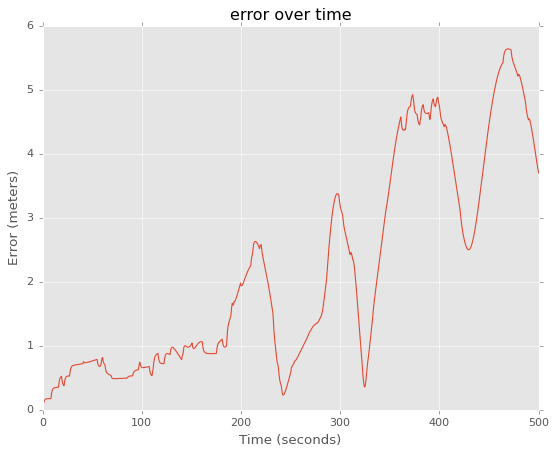

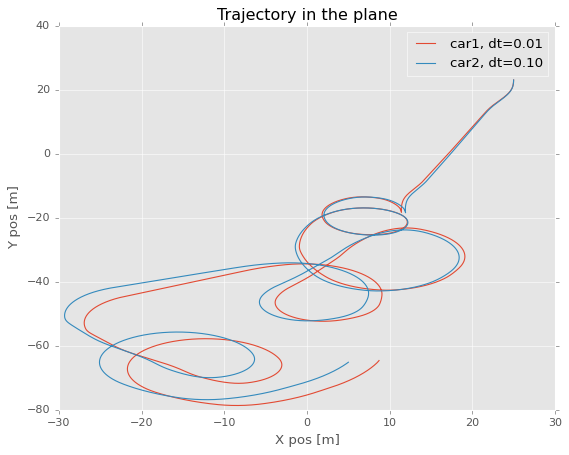

In [6]:
#
dt1 = 0.005 # close to "real"
dt2 = 0.1 # Simulated
steps = 5000
#
states_1, alphas_1, directions_1, v_refs_1, alpha_refs_1, psis_1, states_2, alphas_2, directions_2, v_refs_2, alpha_refs_2, psis_2, times = test_stability(dt1, dt2, steps)
# Plotting
time_axis_2 = np.linspace(0, steps*dt2-dt2, steps)
time_axis_1 = np.linspace(0, steps*times*dt1-dt1, steps*times)
Xs_1 = states_1[0, :].T
Ys_1 = states_1[1, :].T
Xs_2 = states_2[0, :].T
Ys_2 = states_2[1, :].T
#
plt.plot(Xs_1, Ys_1, label="car1, dt=%.2f" %dt1)
plt.plot(Xs_2, Ys_2, label="car2, dt=%.2f" %dt2)
plt.title("Trajectory in the plane") 
plt.xlabel("X pos [m]")
plt.ylabel("Y pos [m]")
plt.legend()
plt.show()